In [1]:
from __future__ import division
from astropy.io import fits as pyfits
import numpy
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline


# Read in data
Data is a spectrum with times, counts, and exposures.  Count rates per bin (of the 128 bins in the detector) can be calculated by summming the usable energy channels of each time bin and dividing by the exposure (length of time) of that bin.

The light curve will be rates vs times.

In [2]:
chmin, chmax = 4, 125 # channel cuts. 
File='/Users/KimiZ/FermiData/bn090323002/glg_cspec_n7_bn090323002_v02.pha'
f           = pyfits.open(File)
trigtime    = f[0].header['TRIGTIME']
SPEC        = f['SPECTRUM']
d           = SPEC.data[(SPEC.data.field('QUALITY') == 0)] # good data
counts      = d.field('COUNTS')
times       = d.field('TIME') - trigtime   # TIME
exposures   = d.field('EXPOSURE')
N           = len(times)
rates = N * [0]
        
for j in range(N):
    if (exposures[j] > 0):
        rates[j] = counts[j][chmin:chmax+1].sum() / exposures[j]

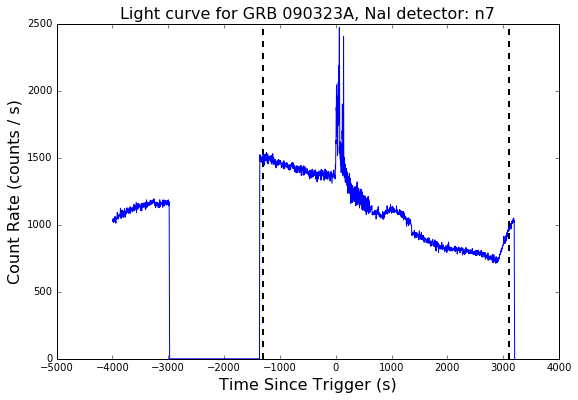

In [3]:
plt.figure(figsize=(9,6))
plt.plot(times, rates)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

## Combine times, rates, and exposurs into an ndarray

In [4]:
data = zip(times, rates, exposures)
data = numpy.asarray(data)

In [5]:
data

array([[ -4.00031371e+03,   1.02537236e+03,   4.08241940e+00],
       [ -3.99621771e+03,   1.04085107e+03,   4.08223629e+00],
       [ -3.99212165e+03,   1.03839403e+03,   4.08226538e+00],
       ..., 
       [  3.19868066e+03,   1.03256982e+03,   4.08882761e+00],
       [  3.20277672e+03,   5.30998354e+02,   4.09605789e+00],
       [  3.20687278e+03,   0.00000000e+00,   2.32920599e+00]])

## We want only the data between -1300 seconds to +3100 seconds

    data[:,0] # all rows of the times column
    data[:,1] # all rows of the rates column 
    data[:,2] # all rows of the exposures column  

In [6]:
data[:,0] # all rows of the times column

array([-4000.31370997, -3996.21770999, -3992.12164602, ...,  3198.68065801,
        3202.77671799,  3206.872776  ])

### The following doesn't work because it only slices using the data indices. This slicing only gives us the first 10 elements in the times array.  We want a certain block of time.

In [7]:
data[:,0][:10]

array([-4000.31370997, -3996.21770999, -3992.12164602, -3988.02558401,
       -3983.92952201, -3979.83345801, -3975.737396  , -3971.641332  ,
       -3967.54525399, -3963.44919202])

In [8]:
cond1 = data[:,0] > -1300.0
cond2 = data[:,0] < 3100.0
data2 = data[cond1 & cond2]; data2

array([[-1296.40325603,  1530.29819634,     4.07632971],
       [-1292.307192  ,  1472.30990715,     4.07590818],
       [-1288.211128  ,  1488.78342881,     4.07648277],
       ..., 
       [ 3088.08701998,   948.10359343,     4.08288717],
       [ 3092.18308002,   965.25012756,     4.08287954],
       [ 3096.279138  ,   960.31584664,     4.08303165]])

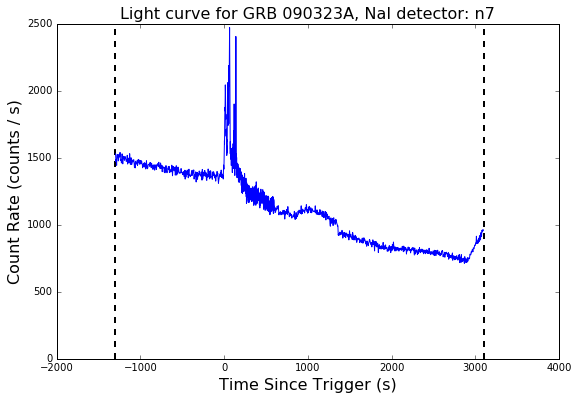

In [9]:
x,y = data2[:,0], data2[:,1]  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

#### Or, you could combine this into one step:

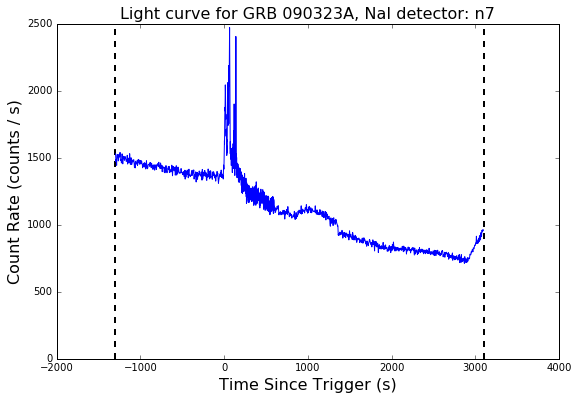

In [10]:
del data2

data2 = data[(data[:,0] > -1300.0) & (data[:,0] < 3100.0)]; data2

x,y = data2[:,0], data2[:,1]  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

## Using:  numpy.where

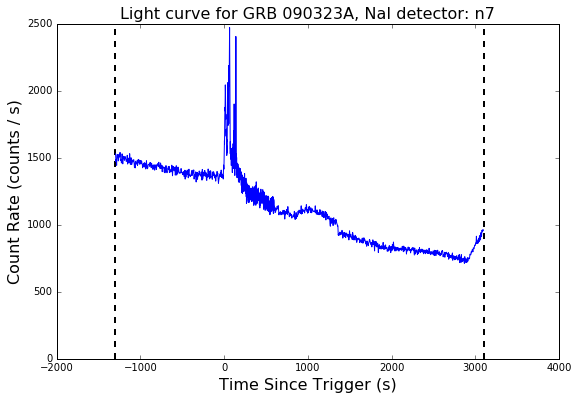

In [11]:
del data2

data2 = data[numpy.where((data[:,0] > -1300.0) & (data[:,0] < 3100.0))]

x,y = data2[:,0], data2[:,1]  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

---

# Using Pandas DataFrames

In [12]:
import pandas as pd

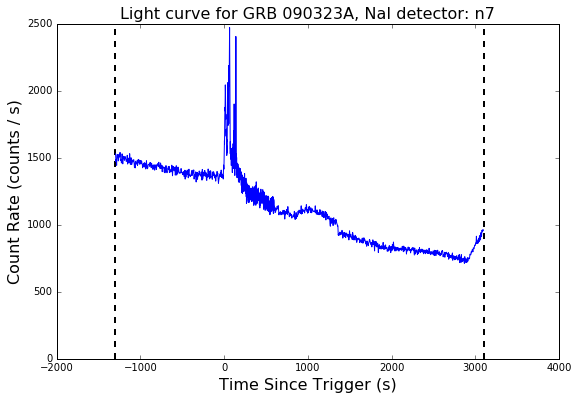

In [13]:
del data, data2

data = pd.DataFrame(zip(times, rates, exposures), 
                   columns = ['Times','Rates', 'Exposures']) 

data2 = data[data.Times.between(-1300.0, 3100.0)]

x,y = data2.Times, data2.Rates  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

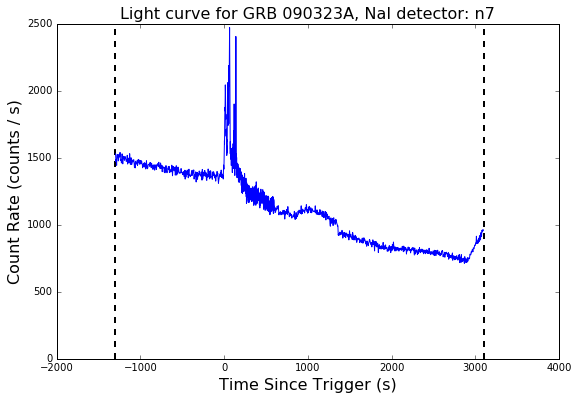

In [14]:
del data2

data2 = data[(data.Times > -1300.0) & (data.Times < 3100.0)]

x,y = data2.Times, data2.Rates  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)

---

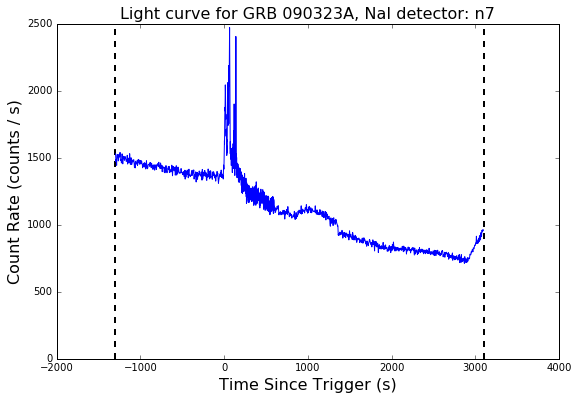

In [15]:
del data2

condition = data['Times'].map(lambda x: (x > -1300.0) and (x < 3100.0))
data2 = data[condition]

x,y = data2.Times, data2.Rates  # times, rates
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
plt.title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
plt.xlabel('Time Since Trigger (s)', fontsize=16)
plt.ylabel('Count Rate (counts / s)', fontsize=16)